In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

from matplotlib.ticker import EngFormatter, MultipleLocator
from glob import glob
from itertools import count

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['pgf.rcfonts'] = True
matplotlib.rcParams['font.size'] = 12

In [2]:
DATA_ROOT = '../data/fakes/output/'

In [3]:
suffix_names = {
    'Gaia16aye_format': 'Gaia16aye/1',
    'Gaia16aye_2': 'Gaia16aya/2',
    'Gaia16aye_3': 'Gaia16aya/3',
    'ZTF18ablruzq': 'ZTF18ablruzq',
    'ZTF18acskgwu': 'ZTF18acskgwu',
    'ZTF18aaztjyd': 'ZTF18aaztjyd',
    'ZTF18abaqxrt': 'ZTF18abaqxrt',
    'OGLE-LMC-CEP-0227': 'OGLE-LMC-CEP-0227',
    'kilonova170817': 'Kilonova 170817',
    'delta_inverse_noise': 'Point Down',
    'delta_noise': 'Point Up',
    'flat_0': 'Flat Without Noise',
    'flat_noise': 'Flat With Noise',
    'step_noise': 'Step Up',
    'step_inverse': 'Step Down',
}


def path_to_name(path):
    filename = os.path.basename(path)
    name, = (name for suffix, name in suffix_names.items() if filename.startswith(suffix))
    return name

In [4]:
def plot_field(field, *, folder, ax_, marker, color):
    path_pattern = os.path.join(folder, '*.csv')
    paths = glob(path_pattern)
    name_paths = {path_to_name(path): path for path in paths}
    assert len(paths) == 15
    label = None
    for i, name, ax in zip(count(), suffix_names.values(), ax_.flat):
        data = pd.read_csv(name_paths[name])
        ax.set_title(name)
        ax.set_xlim([58180, 58520])
        if i < 12:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('MJD')
        ax.invert_yaxis()
        y_ticks_fmt = ax.get_yaxis().get_major_formatter()
        y_ticks_fmt.set_useOffset(False)
        if name == 'flat':
            ax.yaxis.set_major_locator(MultipleLocator(0.0050))
        label = field if label is None else ''
        alpha = 0.1 if name == 'flat without noise' else 1.0
        ax.errorbar(data['mjd'], data['mag'], data['magerr'],
                    marker=marker, color=color, label=label, alpha=alpha,
                    markersize=2.0, elinewidth=1.0, ls='')
        if name == 'flat':
            ax.set_ylim([14.01, 13.99])

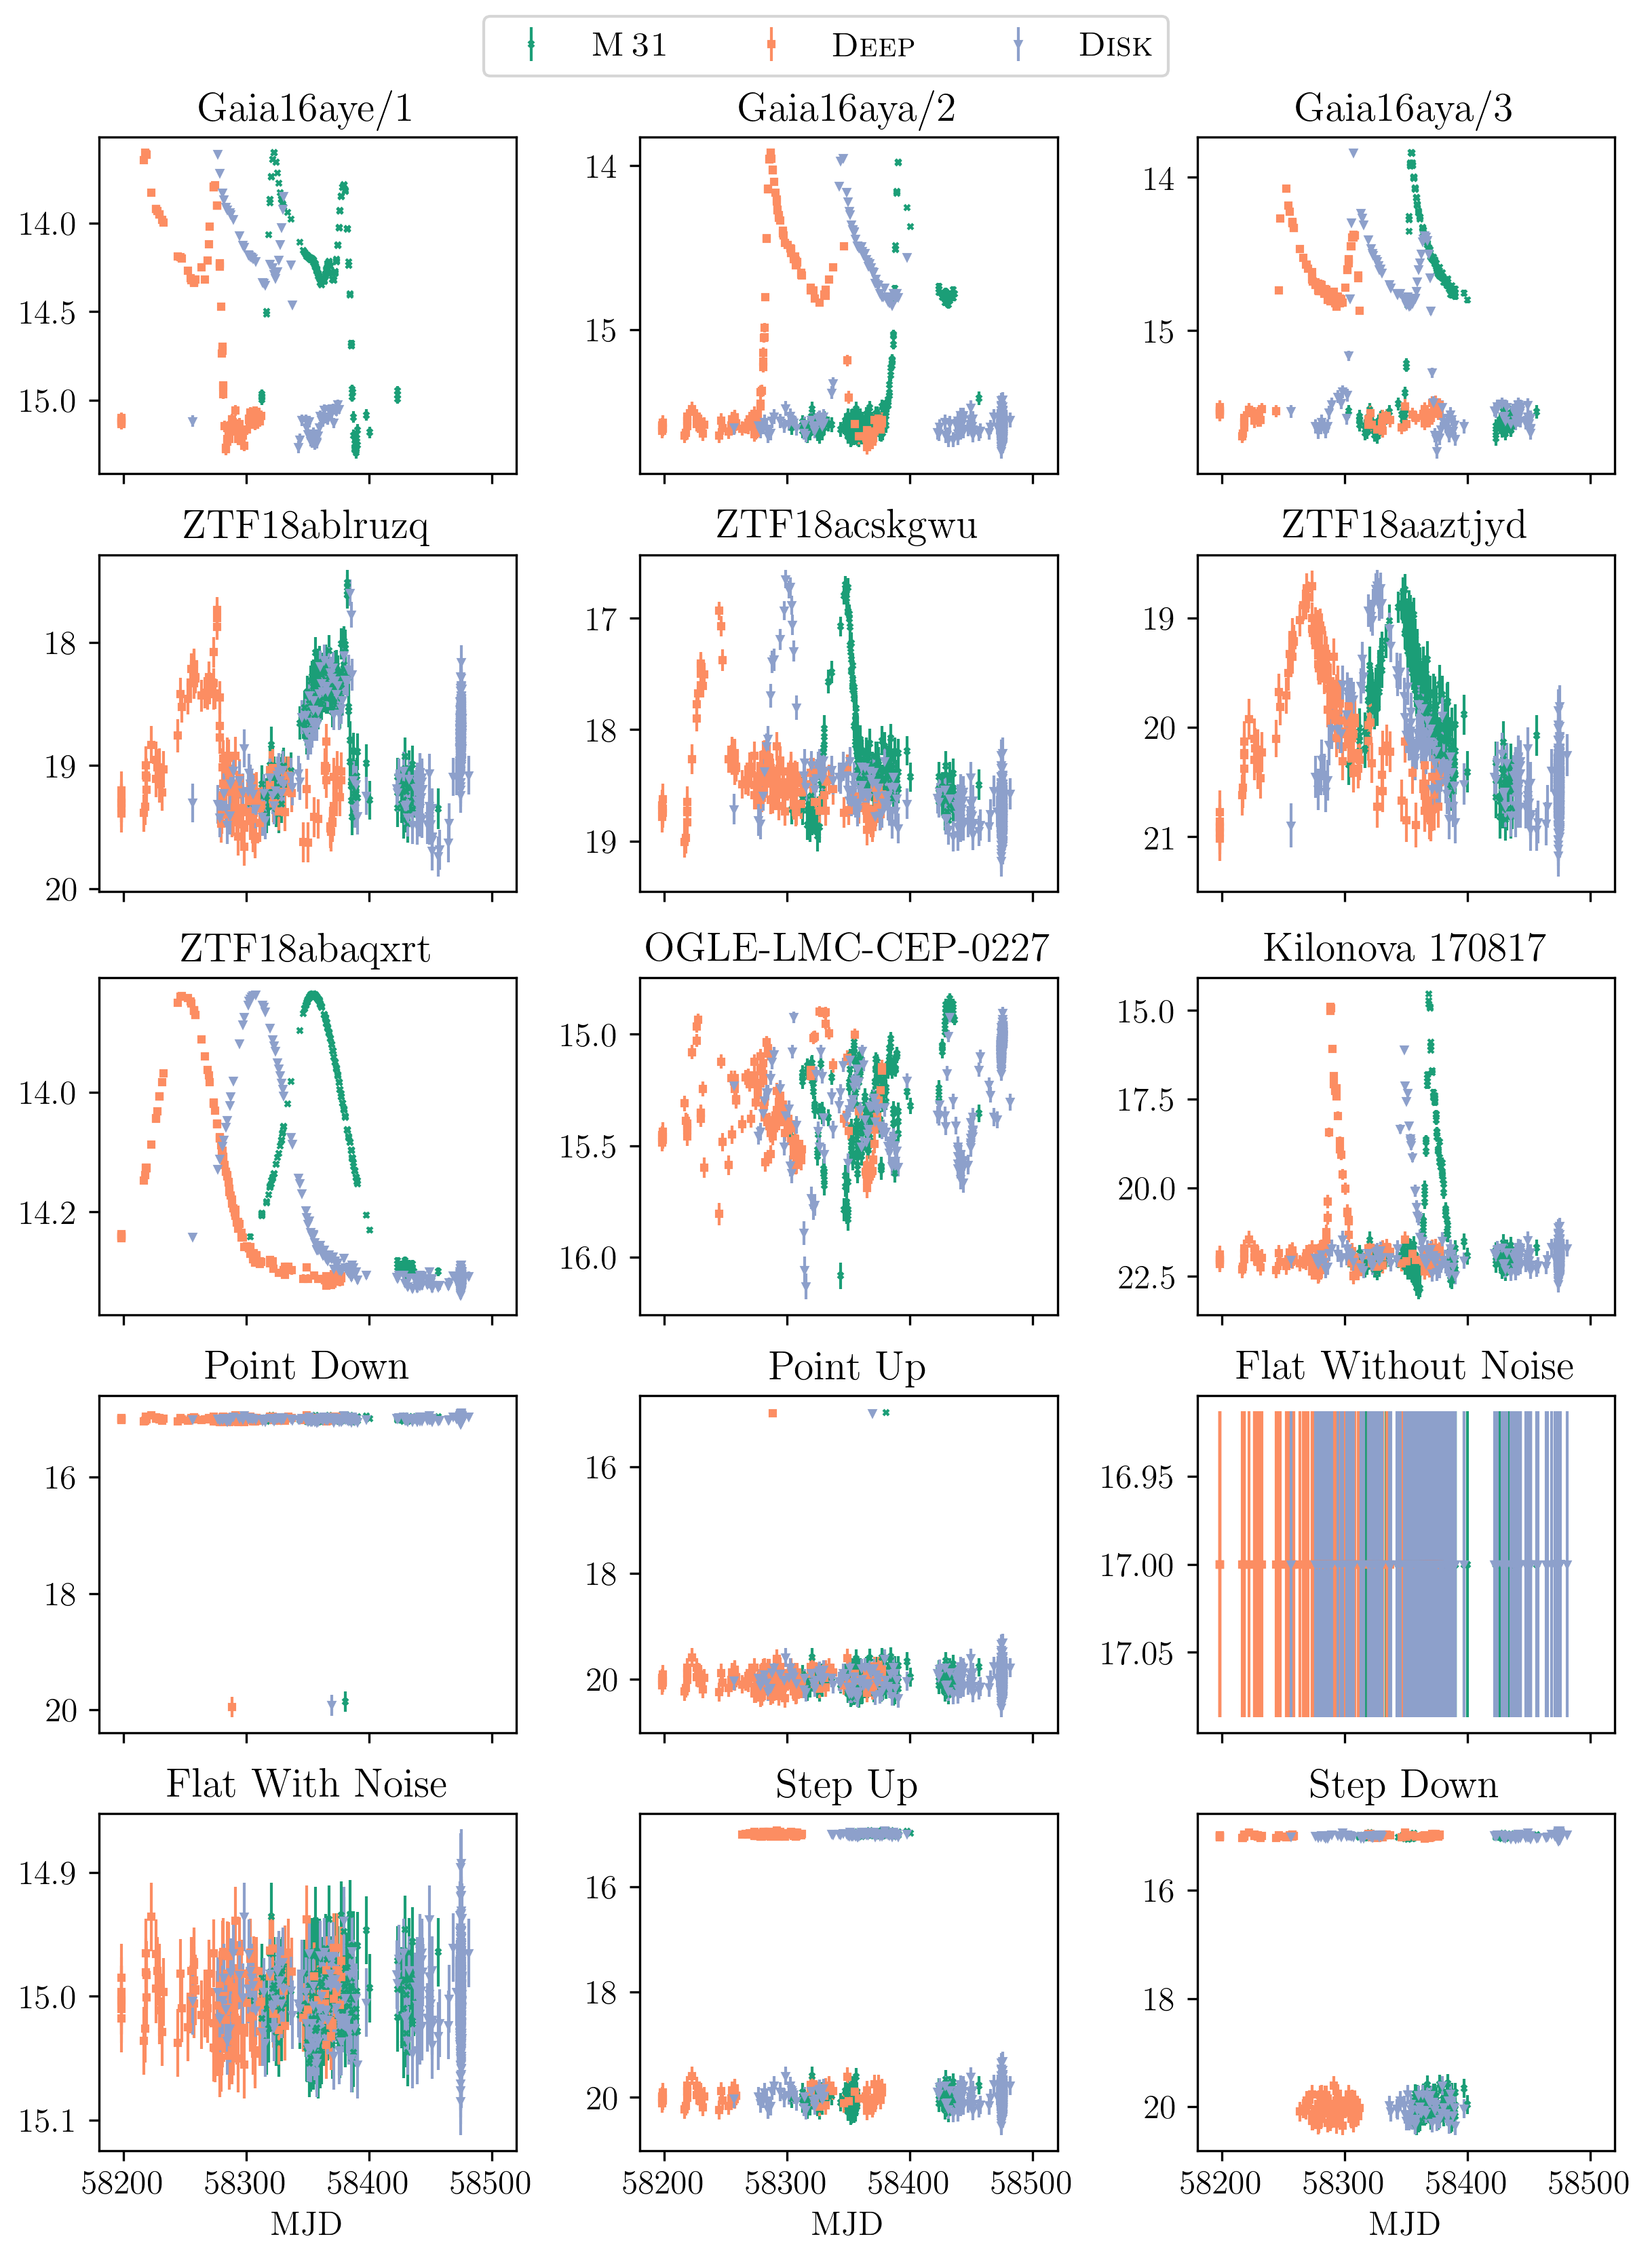

In [5]:
fig, ax_ = plt.subplots(5, 3, figsize=(8, 11), dpi=300, constrained_layout=True)
# plt.subplots_adjust(wspace=0.37)

for name, dirname, marker, color in [
    (r'\textsc{M\,31}', 'FID695', 'x', '#1b9e77'),
    (r'\textsc{Deep}', 'FID795', 's', '#fc8d62'),
    (r'\textsc{Disk}', 'FID807', 'v', '#8da0cb'),
]:
    folder = os.path.join(DATA_ROOT, dirname)
    plot_field(field=name, folder=folder, ax_=ax_, marker=marker, color=color)
fig.suptitle(' ')  # Make empty space for the legend
fig.legend(loc='upper center', ncol=3)
fig.savefig('../figs/fakes_lc.pdf')